In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
flow = pd.read_excel('/Users/manraj/Downloads/Green Infrastructure/CityStudio_Water_Data/CoV_Bioswale_Flow1.xlsx')

there are sections in the excel file so we could do before during after kind of  analysis

In [3]:
flow.head()

,TimeStamp,Time (PST),Time (PDT),Unnamed: 3,cov-bios Chnl 02 Min,cov-bios Chnl 02 Avg,cov-bios Chnl 02 Max,Unnamed: 7,Dist to Water,Weir Water,Weir Water.1,Q,Q.1,Unnamed: 13,Unnamed: 14
0,NaT,NaN,NaN,NaN,Volts,Volts,Volts,NaN,Inches,Level Inches,Level M,(L/s),(L/min),NaN,NaN
1,2021-10-20 08:15:00,08:15:00,09:15:00,NaN,0.0025,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-20 08:16:00,08:16:00,09:16:00,NaN,0.005,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-20 08:17:00,08:17:00,09:17:00,NaN,0.005,0.0075,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-20 08:18:00,08:18:00,09:18:00,NaN,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flow.isna().mean()

TimeStamp               0.002732
Time (PST)              0.002732
Time (PDT)              0.002732
Unnamed: 3              1.000000
cov-bios Chnl 02 Min    0.000000
cov-bios Chnl 02 Avg    0.000000
cov-bios Chnl 02 Max    0.000000
Unnamed: 7              1.000000
Dist to Water           0.013661
Weir Water              0.032787
Weir Water.1            0.013661
Q                       0.030055
Q.1                     0.030055
Unnamed: 13             1.000000
Unnamed: 14             0.994536
dtype: float64

In [5]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TimeStamp             365 non-null    datetime64[ns]
 1   Time (PST)            365 non-null    object        
 2   Time (PDT)            365 non-null    object        
 3   Unnamed: 3            0 non-null      float64       
 4   cov-bios Chnl 02 Min  366 non-null    object        
 5   cov-bios Chnl 02 Avg  366 non-null    object        
 6   cov-bios Chnl 02 Max  366 non-null    object        
 7   Unnamed: 7            0 non-null      float64       
 8   Dist to Water         361 non-null    object        
 9   Weir Water            354 non-null    object        
 10  Weir Water.1          361 non-null    object        
 11  Q                     355 non-null    object        
 12  Q.1                   355 non-null    object        
 13  Unnamed: 13         

In [6]:
flow.drop(columns=['Unnamed: 3', 'Unnamed: 7', 'Unnamed: 13'], inplace=True)

In [7]:
flow.select_dtypes(include='object').columns

Index(['Time (PST)', 'Time (PDT)', 'cov-bios Chnl 02 Min',
       'cov-bios Chnl 02 Avg', 'cov-bios Chnl 02 Max', 'Dist to Water',
       'Weir Water', 'Weir Water.1', 'Q', 'Q.1', 'Unnamed: 14'],
      dtype='object')

In [8]:
dateTimeChange = ['Time (PST)', 'Time (PDT)']
numberChange = ['cov-bios Chnl 02 Min',
       'cov-bios Chnl 02 Avg', 'cov-bios Chnl 02 Max', 'Dist to Water',
       'Weir Water', 'Weir Water.1', 'Q', 'Q.1']

In [9]:
flow.isna().mean()

TimeStamp               0.002732
Time (PST)              0.002732
Time (PDT)              0.002732
cov-bios Chnl 02 Min    0.000000
cov-bios Chnl 02 Avg    0.000000
cov-bios Chnl 02 Max    0.000000
Dist to Water           0.013661
Weir Water              0.032787
Weir Water.1            0.013661
Q                       0.030055
Q.1                     0.030055
Unnamed: 14             0.994536
dtype: float64

In [10]:
flow.dropna(subset=['TimeStamp', 'Time (PST)' , 'Time (PDT)'], inplace=True)

In [11]:
flow.isna().mean()

TimeStamp               0.000000
Time (PST)              0.000000
Time (PDT)              0.000000
cov-bios Chnl 02 Min    0.000000
cov-bios Chnl 02 Avg    0.000000
cov-bios Chnl 02 Max    0.000000
Dist to Water           0.013699
Weir Water              0.032877
Weir Water.1            0.013699
Q                       0.030137
Q.1                     0.030137
Unnamed: 14             0.994521
dtype: float64

In [12]:
flow.rename(columns={'Unnamed: 14': 'Flag'}, inplace=True)

In [13]:
flow.isna().mean()

TimeStamp               0.000000
Time (PST)              0.000000
Time (PDT)              0.000000
cov-bios Chnl 02 Min    0.000000
cov-bios Chnl 02 Avg    0.000000
cov-bios Chnl 02 Max    0.000000
Dist to Water           0.013699
Weir Water              0.032877
Weir Water.1            0.013699
Q                       0.030137
Q.1                     0.030137
Flag                    0.994521
dtype: float64

In [14]:
flow['TimeStamp'] = pd.to_datetime(flow['TimeStamp'])

pst_td = pd.to_timedelta(flow['Time (PST)'].astype(str))
pdt_td = pd.to_timedelta(flow['Time (PDT)'].astype(str))

flow['Time (PST)'] = flow['TimeStamp'].dt.normalize() + pst_td
flow['Time (PDT)'] = flow['TimeStamp'].dt.normalize() + pdt_td


In [15]:
flow['Flag'].dropna().unique().tolist()

['City Water on', 'City water off']

In [16]:
flow.loc[flow['Flag'].isin(flow['Flag'].dropna().unique().tolist())]

,TimeStamp,Time (PST),Time (PDT),cov-bios Chnl 02 Min,cov-bios Chnl 02 Avg,cov-bios Chnl 02 Max,Dist to Water,Weir Water,Weir Water.1,Q,Q.1,Flag
21,2021-10-20 08:35:00,2021-10-20 08:35:00,2021-10-20 09:35:00,5.8875,5.9075,5.925,6.95375,-0.00375,-0.000095,NaN,NaN,City Water on
316,2021-10-20 13:30:00,2021-10-20 13:30:00,2021-10-20 14:30:00,2.735,2.7675,2.79,5.38375,1.56625,0.039783,0.181228,10.873661,City water off


In [17]:
before = flow.loc[(flow.index < 21)].copy()
during = flow.loc[(flow.index >= 21) & (flow.index < 316)].copy()
after = flow.loc[(flow.index >= 316)].copy()

In [18]:
flow['Flag'].loc[(flow.index < 21)] = 'Before'
flow['Flag'].loc[(flow.index >= 21) & (flow.index < 316)] = 'During'
flow['Flag'].loc[(flow.index >= 316)] = 'After'

/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_30267/2920512060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow['Flag'].loc[(flow.index < 21)] = 'Before'
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_30267/2920512060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow['Flag'].loc[(flow.index >= 21) & (flow.index < 316)] = 'During'
/var/folders/9p/w309j4n94633ymfb_v3x990r0000gn/T/ipykernel_30267/2920512060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

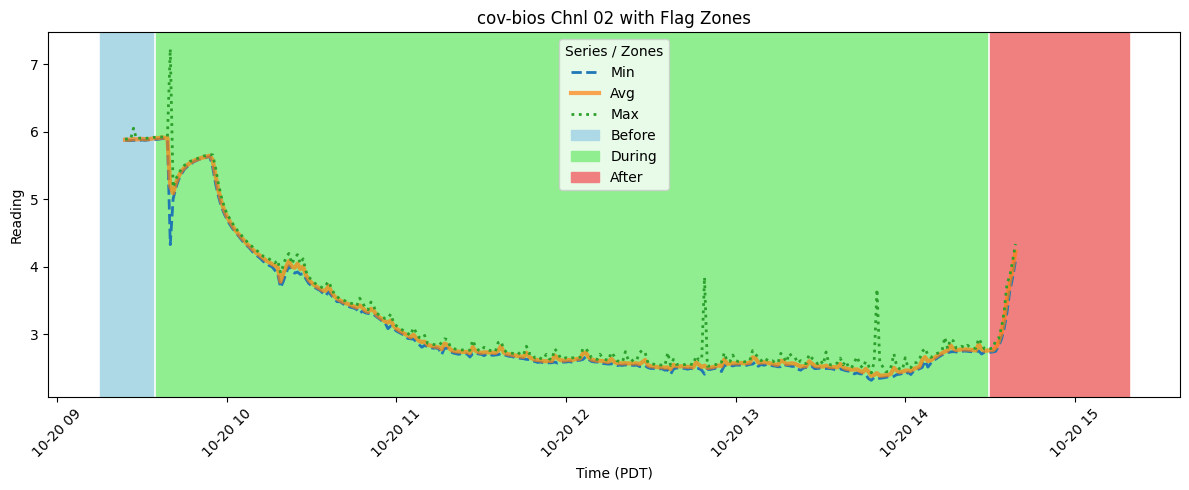

In [42]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(
    data=flow.loc[(flow.index >= 10) & (flow.index <= 325)],
    x='Time (PDT)', y='cov-bios Chnl 02 Min',
    label='Min',
    linestyle='--',
    linewidth=2,
    alpha=1,
    ax=ax
)

sns.lineplot(
    data=flow.loc[(flow.index >= 10) & (flow.index <= 325)],
    x='Time (PDT)', y='cov-bios Chnl 02 Avg',
    label='Avg',
    linestyle='-',
    linewidth=3,
    alpha=0.7,
    ax=ax
)

sns.lineplot(
    data=flow.loc[(flow.index >= 10) & (flow.index <= 325)],
    x='Time (PDT)', y='cov-bios Chnl 02 Max',
    label='Max',
    linestyle=':',
    linewidth=2,
    alpha=1,
    ax=ax
)

ax.axvspan(before['Time (PDT)'].min(), before['Time (PDT)'].max(),
           color='lightblue',  alpha=1, label='Before')
ax.axvspan(during['Time (PDT)'].min(), during['Time (PDT)'].max(),
           color='lightgreen', alpha=1, label='During')
ax.axvspan(after['Time (PDT)'].min(), after['Time (PDT)'].max(),
           color='lightcoral', alpha=1, label='After')

ax.set_title('cov-bios Chnl 02 with Flag Zones')
ax.set_xlabel('Time (PDT)')
ax.set_ylabel('Reading')
ax.legend(title='Series / Zones', loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

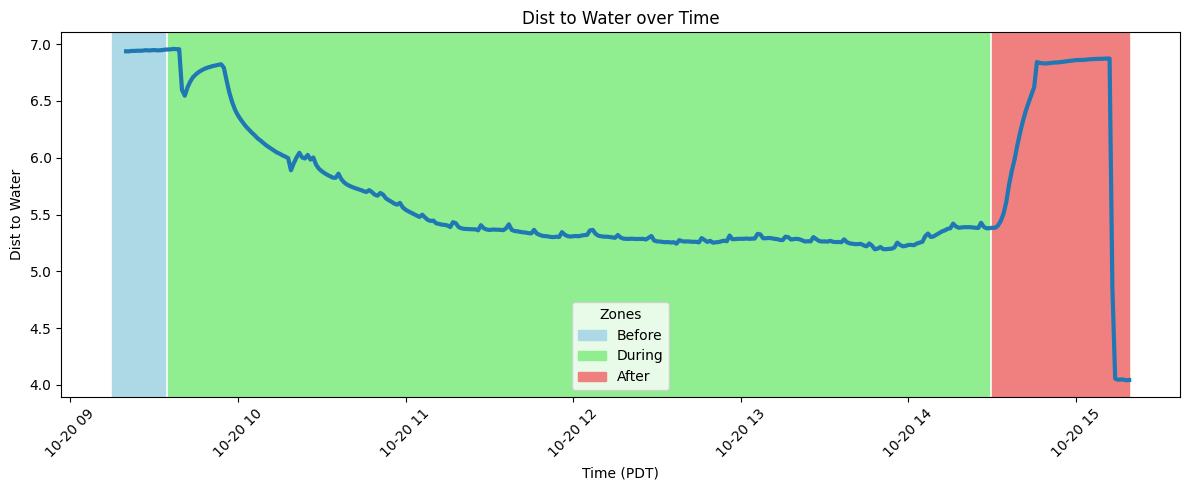

In [43]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Dist to Water',
    linewidth=3,
    alpha=1,
    ax=ax
)

ax.axvspan(before['Time (PDT)'].min(), before['Time (PDT)'].max(),
           color='lightblue',  alpha=1, label='Before')
ax.axvspan(during['Time (PDT)'].min(), during['Time (PDT)'].max(),
           color='lightgreen', alpha=1, label='During')
ax.axvspan(after['Time (PDT)'].min(), after['Time (PDT)'].max(),
           color='lightcoral', alpha=1, label='After')

ax.set_title('Dist to Water over Time')
ax.set_xlabel('Time (PDT)')
ax.set_ylabel('Dist to Water')
ax.legend(title='Zones', loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

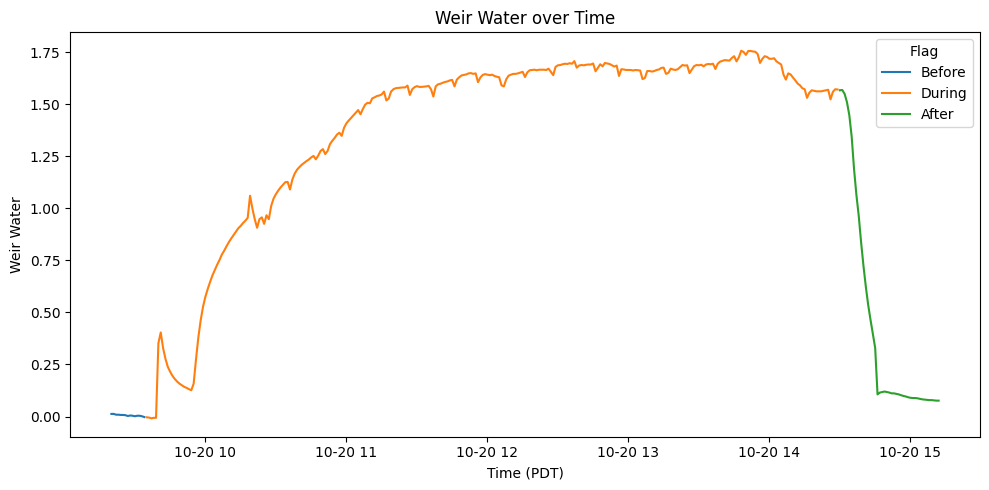

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Weir Water',
    hue='Flag'
)
plt.title('Weir Water over Time')
plt.tight_layout() 
plt.show()

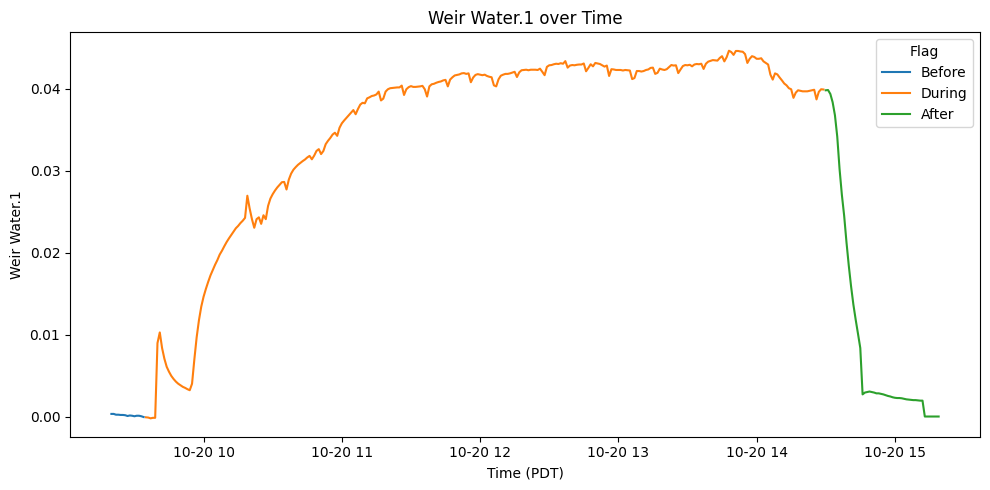

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Weir Water.1',
    hue='Flag'
)
plt.title('Weir Water.1 over Time')
plt.tight_layout() 
plt.show()

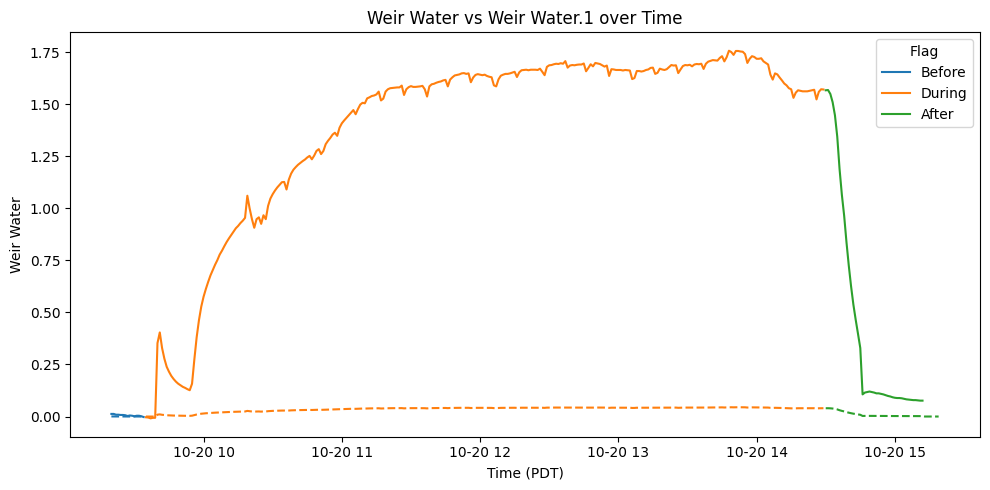

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Weir Water',
    hue='Flag',
    legend='full',
    palette='tab10' 
)

sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Weir Water.1',
    hue='Flag',
    legend=False,  
    palette='tab10',
    linestyle='--'
)

plt.title('Weir Water vs Weir Water.1 over Time')
plt.tight_layout()
plt.show()


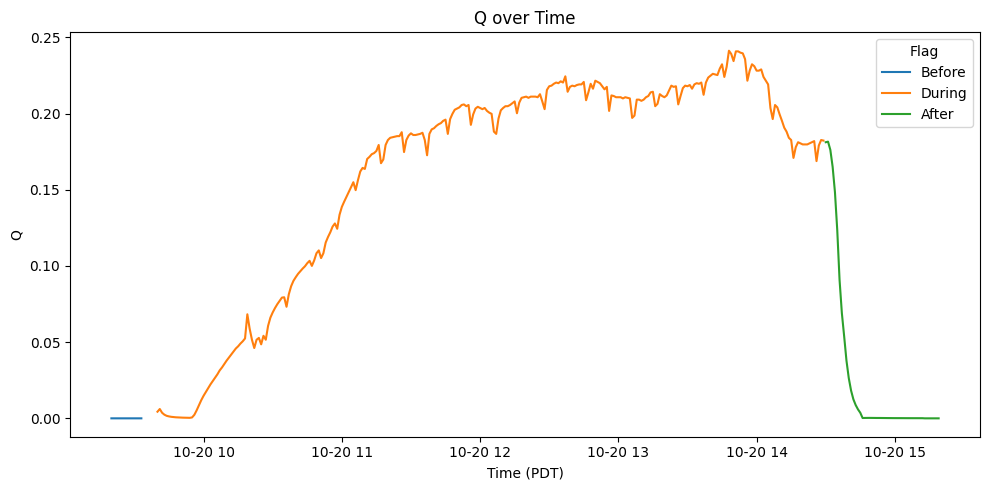

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Q',
    hue='Flag'
)
plt.title('Q over Time')
plt.tight_layout() 
plt.show()

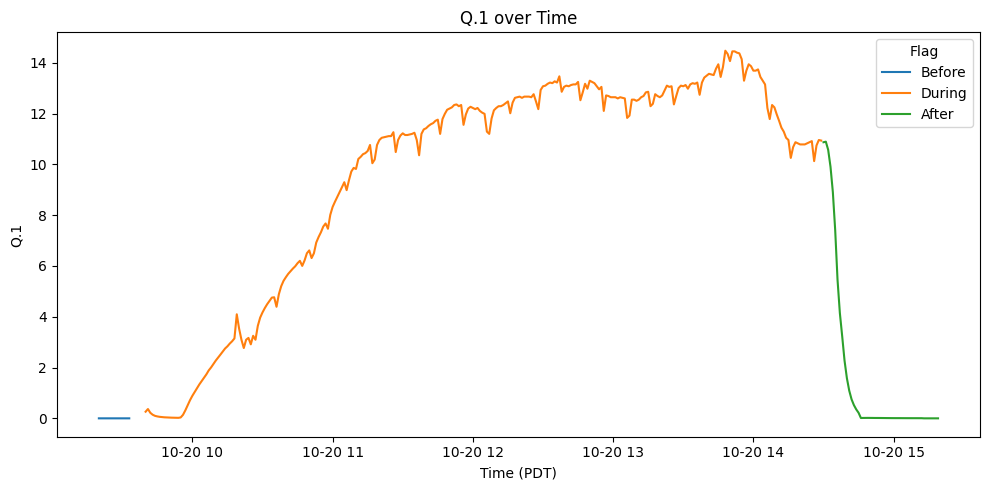

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=flow,
    x='Time (PDT)',
    y='Q.1',
    hue='Flag'
)
plt.title('Q.1 over Time')
plt.tight_layout() 
plt.show()

[]

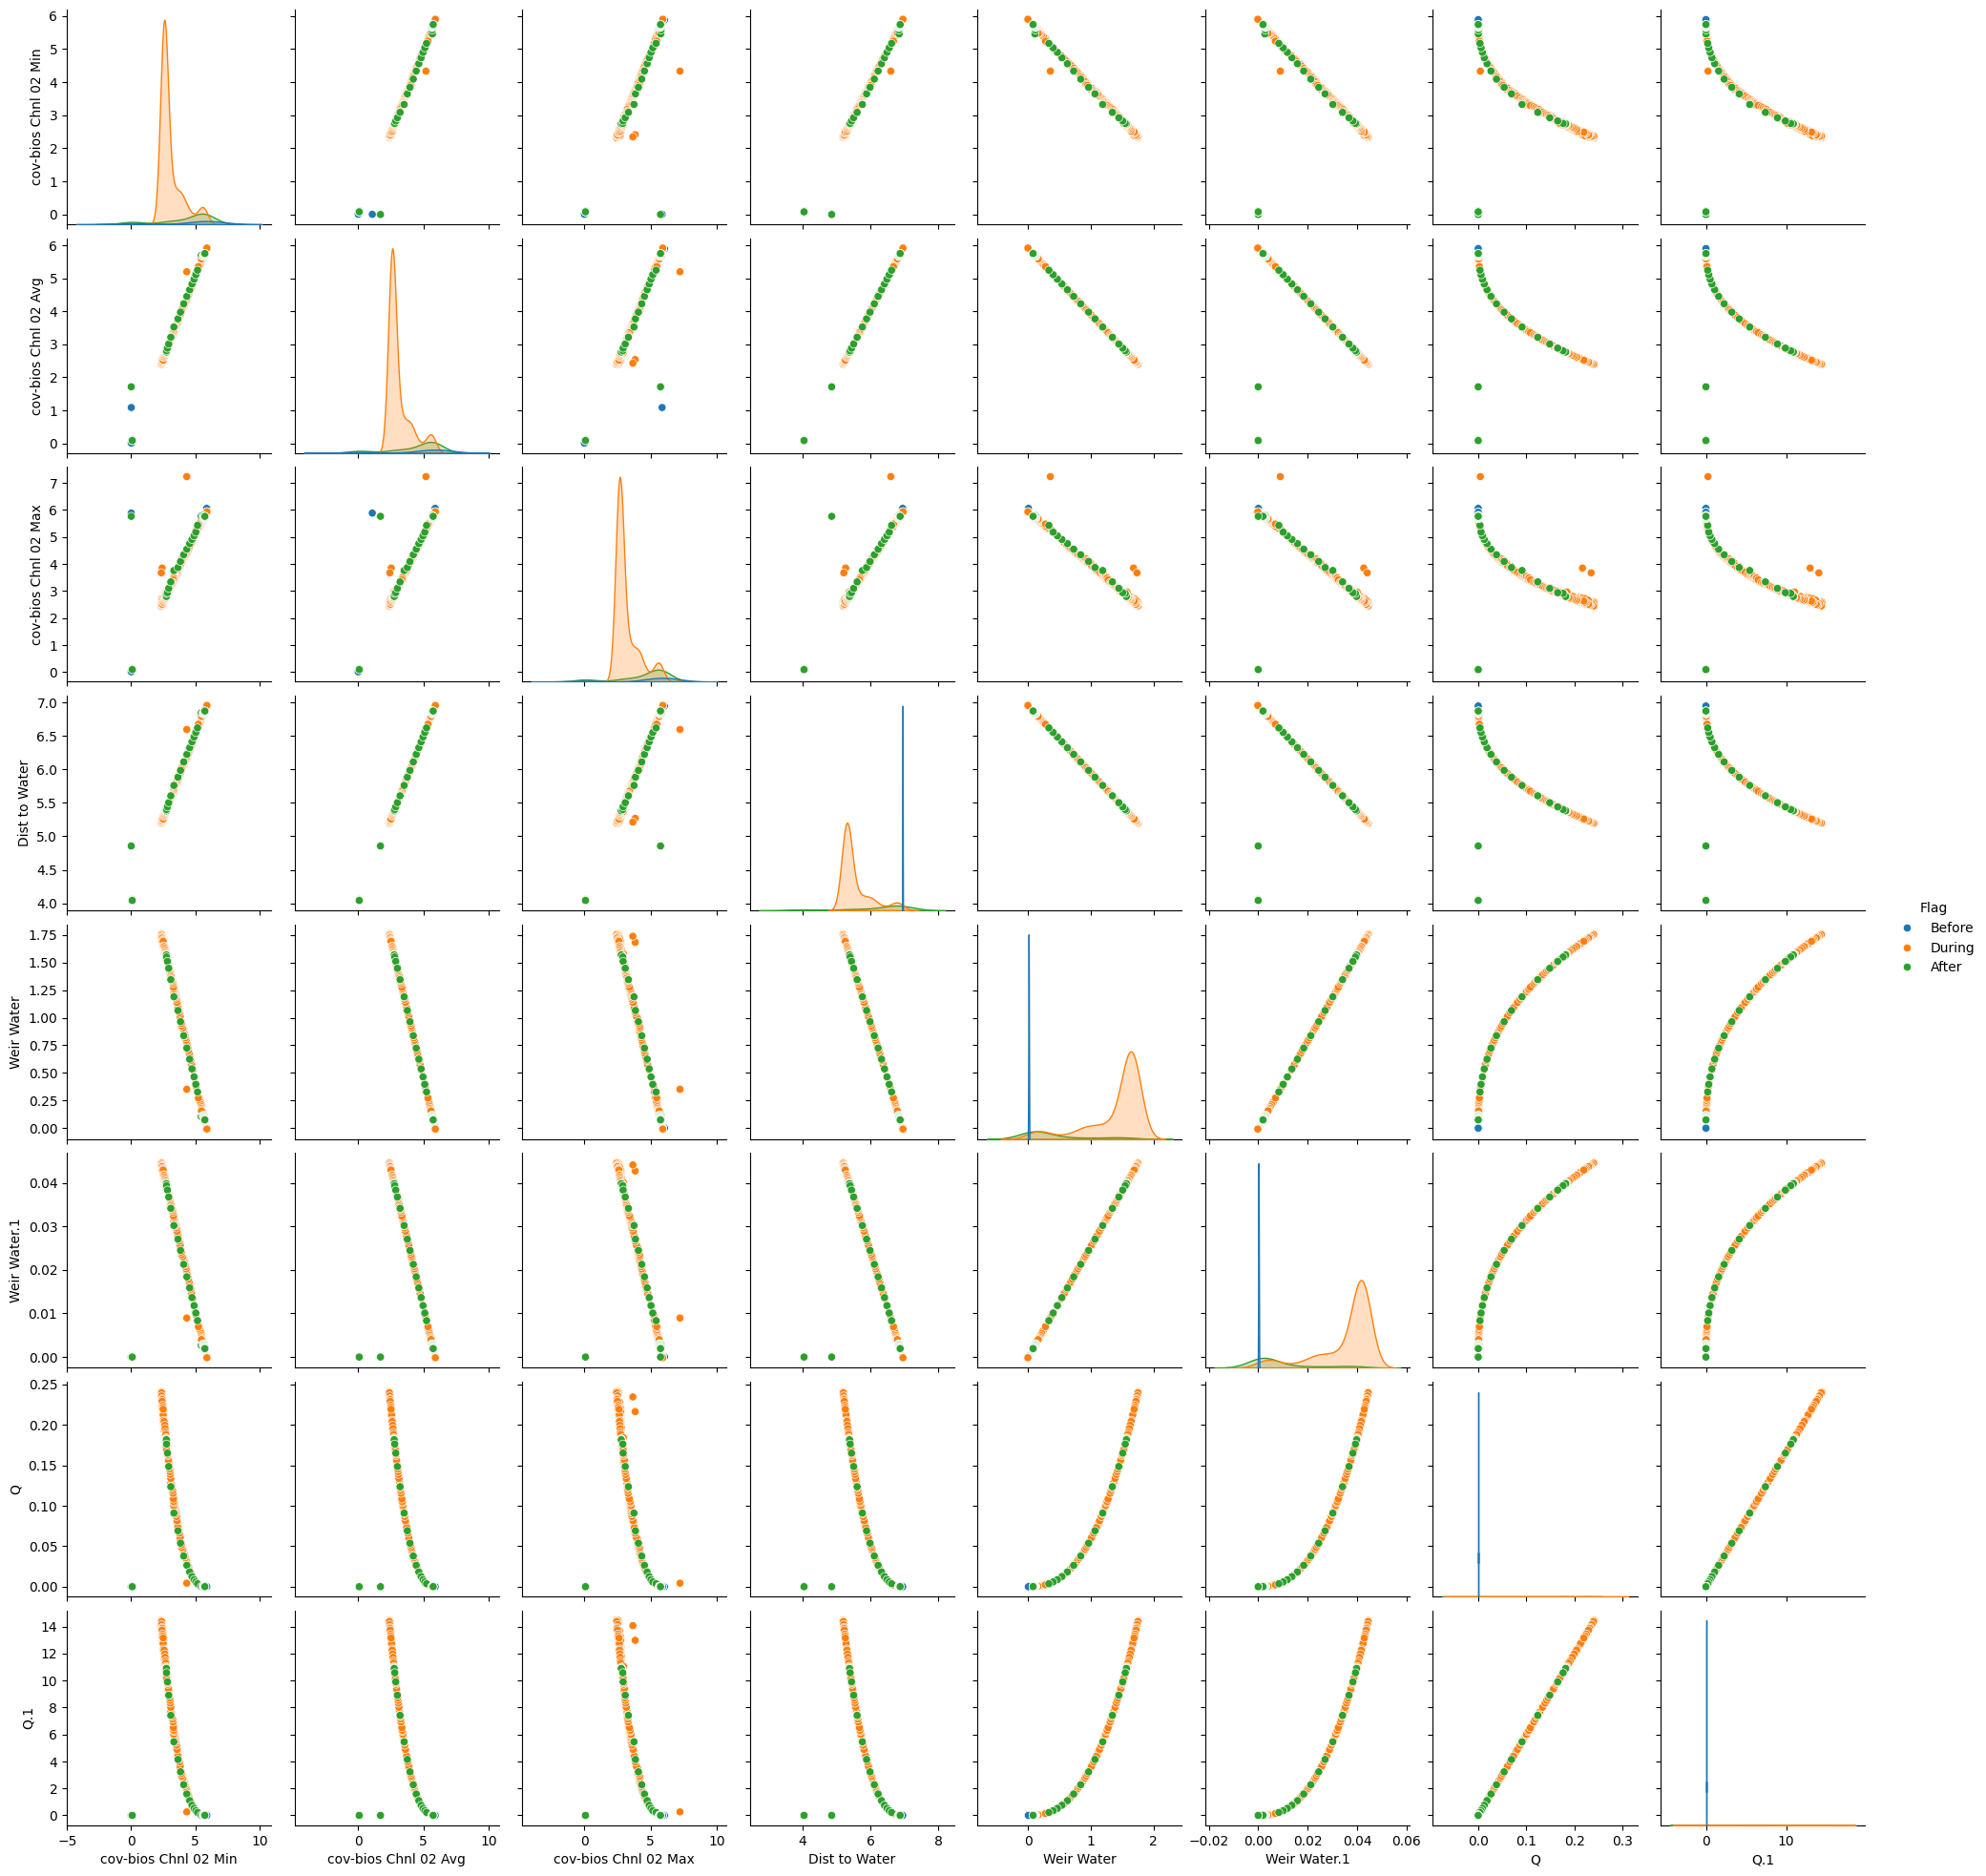

In [44]:
sns.pairplot(data=flow, hue='Flag')
plt.plot()